#### Project: Liver Disease Prediction using 7 different models

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
import warnings
warnings.filterwarnings ('ignore')
sns.set()
plt.style.use('ggplot')
%matplotlib inline

In [3]:
df = pd.read_csv('/Users/simarmalhan/Downloads/indian_liver_patient.csv')

In [4]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


Target column is 'dataset'.

In [5]:
df.shape

(583, 11)

In [6]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [8]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


#### 1. EDA

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [11]:
df.dtypes[df.dtypes == 'object']

Gender    object
dtype: object

#### 1.1 Distribution of numerical features

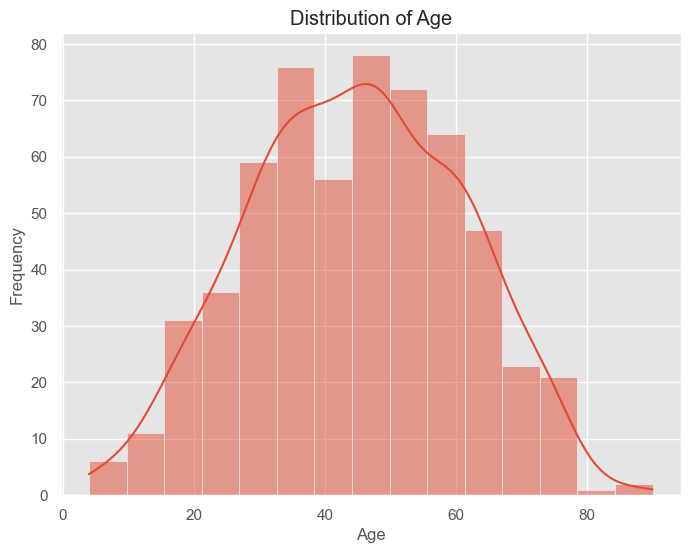

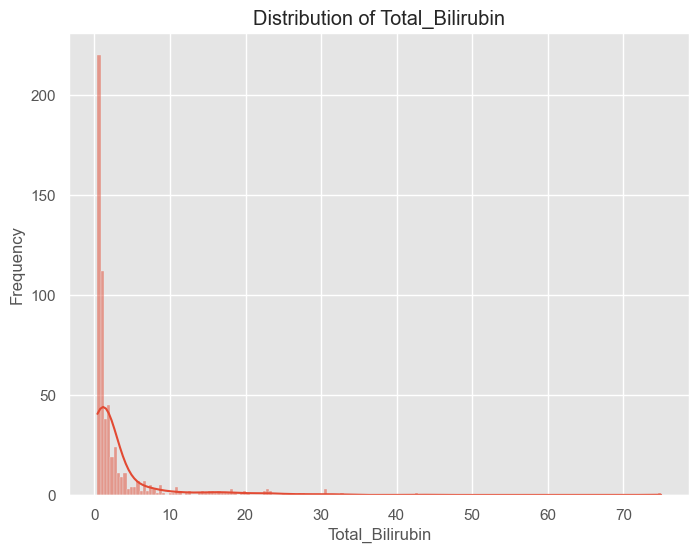

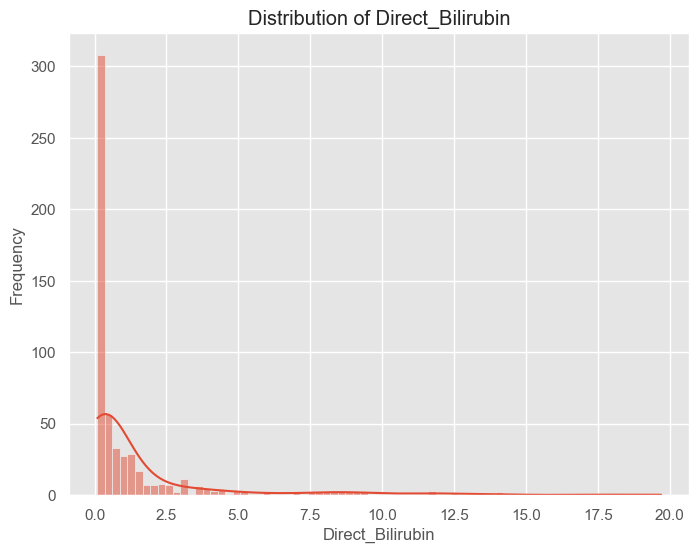

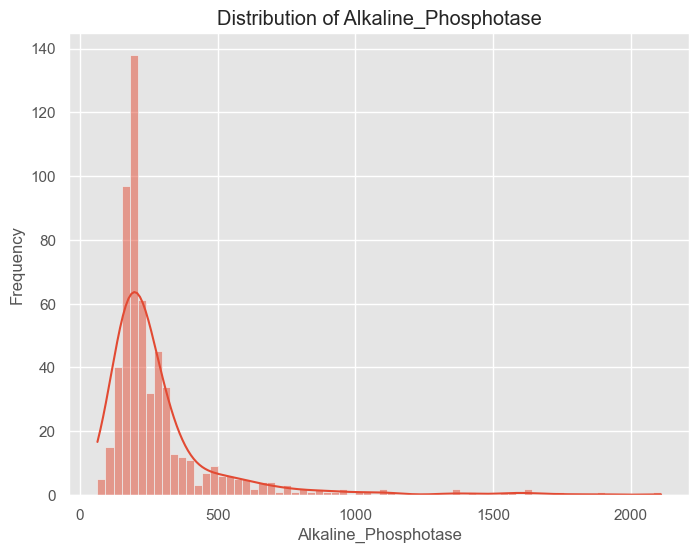

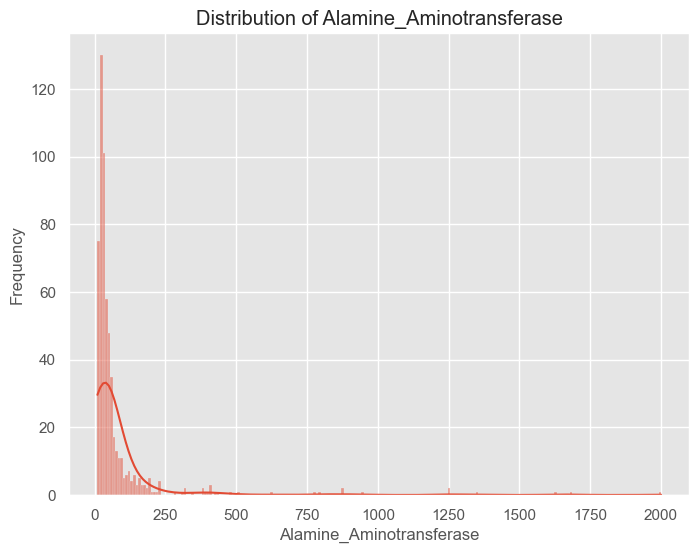

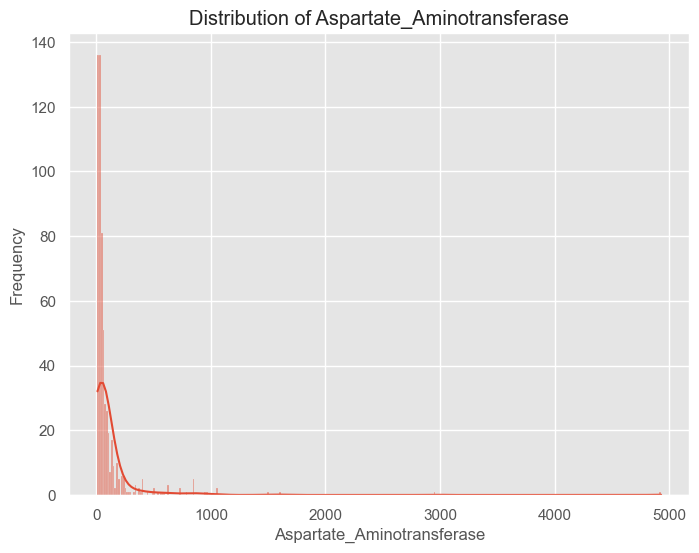

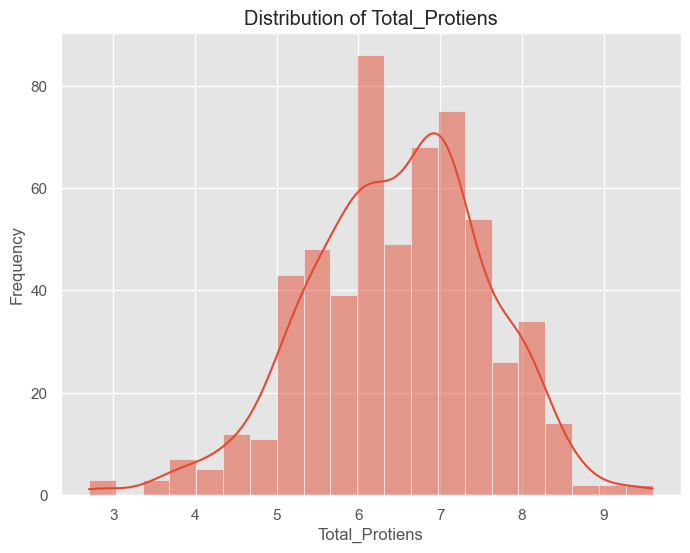

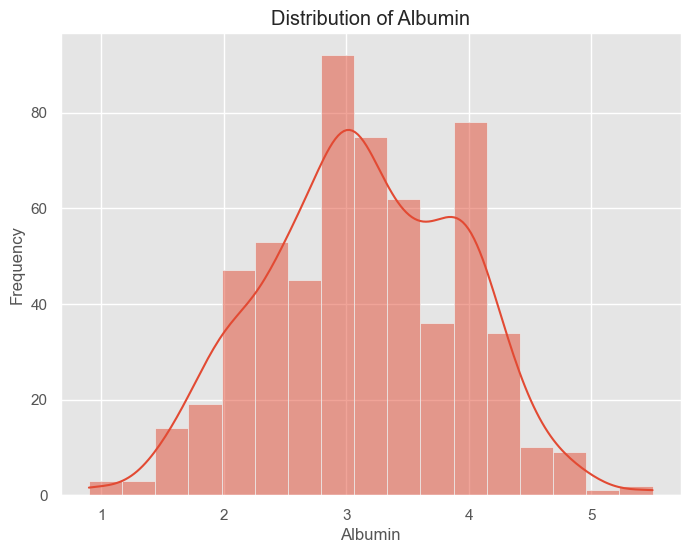

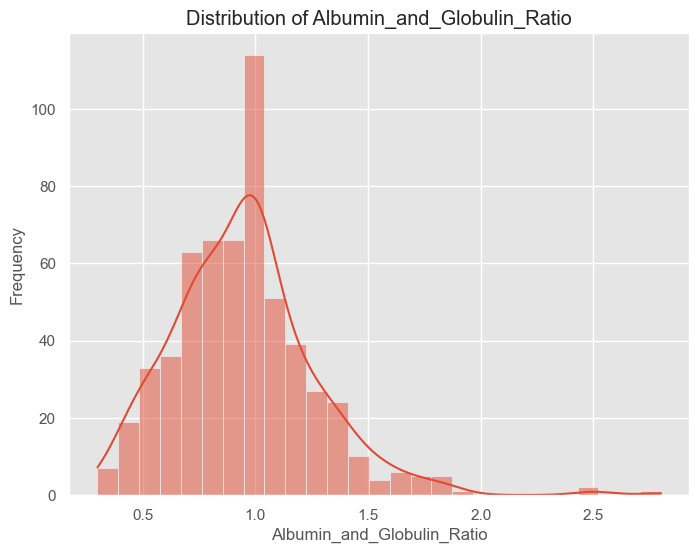

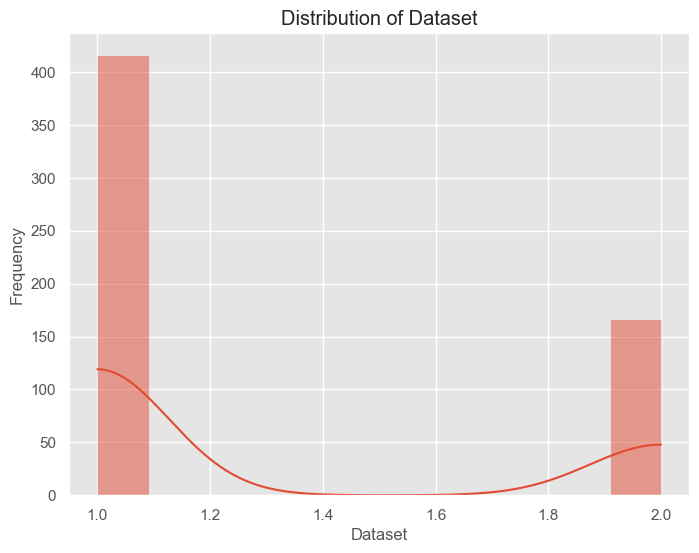

In [12]:
numerical_columns = df.select_dtypes(include = ['int64', 'float64']).columns

# Loop through numerical columns and plot their distributions
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)  # kde=True adds the KDE plot on top of the histogram
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [18]:
df['Dataset'].value_counts()

Dataset
1    416
2    167
Name: count, dtype: int64

In [19]:
df['Dataset'] = df['Dataset'].map(lambda x: 0 if x == 2 else 1)

In [20]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [21]:
df['Dataset'].value_counts()

Dataset
1    416
0    167
Name: count, dtype: int64

In [22]:
df.describe(include = 'object')

,Gender
count,583
unique,2
top,Male
freq,441


#### 1.2 Bar plots for categorical features

<Axes: xlabel='Gender', ylabel='count'>

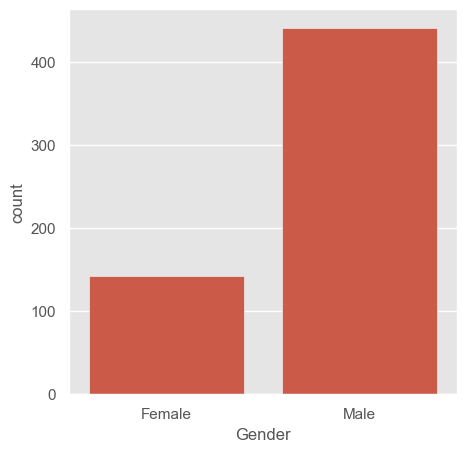

In [24]:
plt.figure(figsize = (5, 5))
sns.countplot(x = 'Gender', data = df)

In [25]:
df['Gender'] = df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)

In [26]:
df['Gender'].value_counts()

Gender
1    441
0    142
Name: count, dtype: int64

#### 1.3 Correlation

In [33]:
df.corr()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,0.056560,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216408,0.137351
Gender,0.056560,1.000000,0.089291,0.100436,-0.027496,0.082332,0.080336,-0.089121,-0.093799,-0.003424,0.082416
Total_Bilirubin,0.011763,0.089291,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206267,0.220208
Direct_Bilirubin,0.007529,0.100436,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200125,0.246046
Alkaline_Phosphotase,0.080425,-0.027496,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.234166,0.184866
Alamine_Aminotransferase,-0.086883,0.082332,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002375,0.163416
Aspartate_Aminotransferase,-0.019910,0.080336,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070040,0.151934
Total_Protiens,-0.187461,-0.089121,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.234887,-0.035008
Albumin,-0.265924,-0.093799,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.689632,-0.161388
Albumin_and_Globulin_Ratio,-0.216408,-0.003424,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,-0.163131


<Axes: >

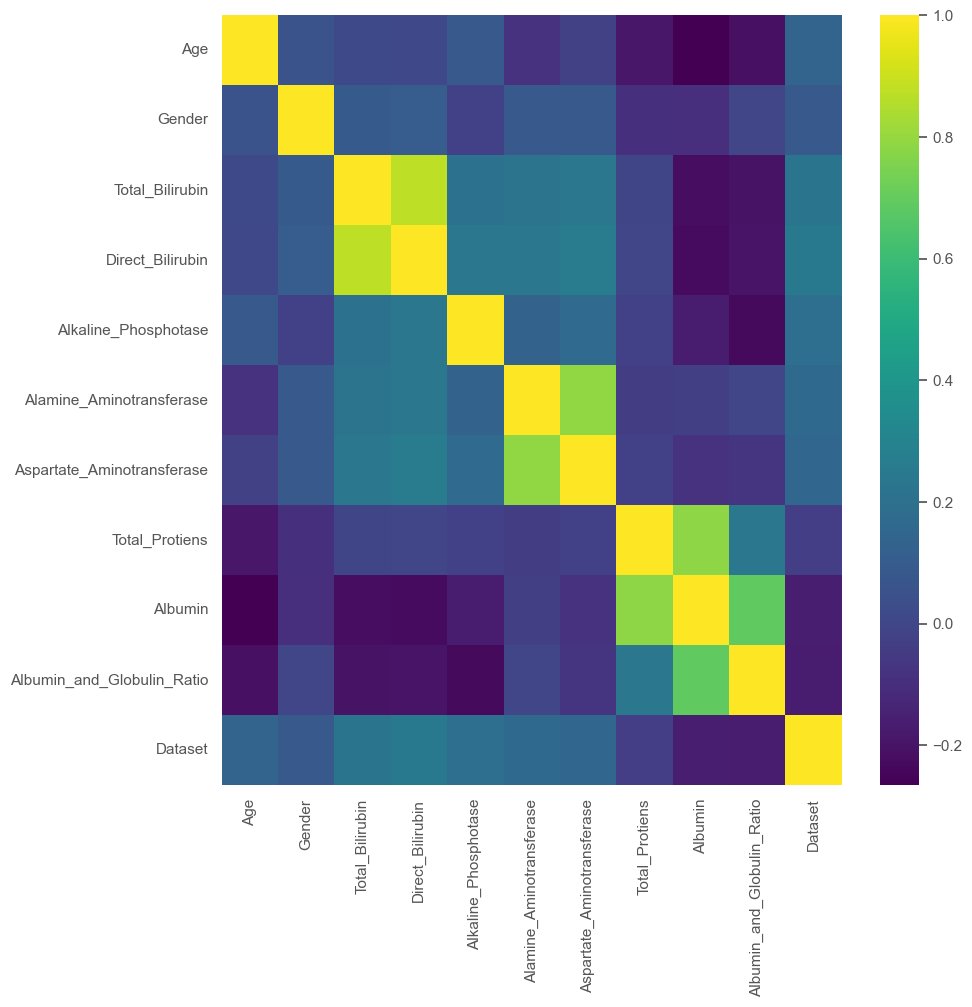

In [34]:
plt.figure(figsize = (10, 10))
sns.heatmap(df.corr(), cmap = 'viridis')

In [35]:
df = df.drop_duplicates()

In [36]:
df.shape

(570, 11)

#### 1.4 Removing Outliers

In [37]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

<Axes: ylabel='Aspartate_Aminotransferase'>

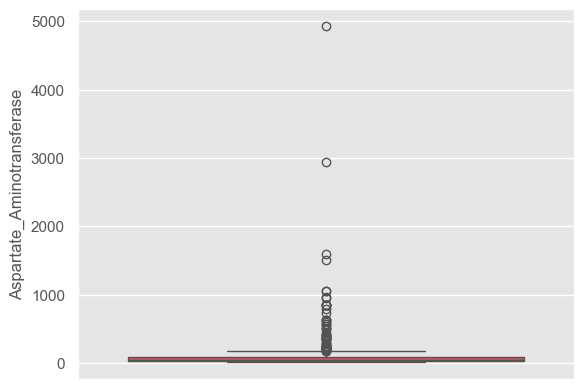

In [38]:
sns.boxplot(df['Aspartate_Aminotransferase'])

<Axes: ylabel='Total_Bilirubin'>

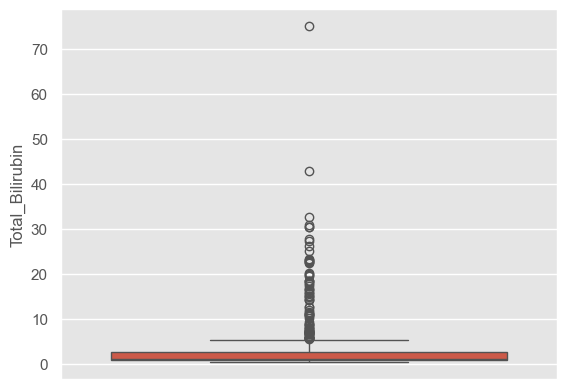

In [39]:
sns.boxplot(df['Total_Bilirubin'])

In [40]:
df['Aspartate_Aminotransferase'].sort_values(ascending = False).head()

135    4929
117    2946
118    1600
207    1500
199    1050
Name: Aspartate_Aminotransferase, dtype: int64

In [41]:
df = df[df.Aspartate_Aminotransferase <= 3000]

In [42]:
df.shape

(569, 11)

In [43]:
df = df[df.Aspartate_Aminotransferase <= 2500]

In [44]:
df.shape

(568, 11)

In [45]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [46]:
df = df.dropna(how = 'any')

In [47]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [48]:
df.shape

(564, 11)

#### 2. Machine Learning Models

#### 2.1 Data Prep

In [49]:
y = df['Dataset']
X = df.drop(['Dataset'], axis = 1)

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

#### 2.1.1 Standardization

In [52]:
train_mean = X_train.mean()
train_std = X_train.std()

In [53]:
X_train = (X_train - train_mean) / train_std

In [54]:
X_train.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02
mean,-1.339160e-16,-5.514190e-17,4.627981e-17,4.135642e-17,-5.514190e-17,-4.726448e-17,-2.166289e-17,4.076562e-16,-3.357748e-16,-1.225923e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.512507e+00,-1.748219e+00,-5.015092e-01,-4.836148e-01,-8.723218e-01,-4.015815e-01,-4.857409e-01,-3.258122e+00,-2.865240e+00,-2.028222e+00
25%,-7.294858e-01,5.707422e-01,-4.250904e-01,-4.467531e-01,-4.548867e-01,-3.252763e-01,-4.044537e-01,-6.461638e-01,-7.028426e-01,-7.751275e-01
50%,8.315947e-03,5.707422e-01,-3.868810e-01,-4.098915e-01,-3.335632e-01,-2.665801e-01,-3.231664e-01,1.001099e-01,-6.684338e-02,1.376206e-01
75%,8.076012e-01,5.707422e-01,-1.194150e-01,-7.813684e-02,2.012559e-02,-1.139697e-01,-9.827167e-02,6.598151e-01,8.235555e-01,4.470267e-01
max,2.775072e+00,5.707422e-01,5.650207e+00,6.225202e+00,7.496943e+00,9.400698e+00,8.130708e+00,2.805352e+00,2.985953e+00,5.706931e+00


In [55]:
X_test = (X_test - train_mean) / train_std

In [56]:
X_test.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000
mean,0.002331,0.016654,0.269949,0.144012,0.085928,-0.109918,-0.089663,0.012604,-0.037576,-0.113464
std,1.006258,0.993291,1.775135,1.205226,1.017121,0.414977,0.606493,1.080223,1.068161,0.937015
min,-2.266573,-1.748219,-0.463300,-0.483615,-0.921674,-0.401582,-0.474903,-3.537974,-2.865240,-1.718816
25%,-0.606519,0.570742,-0.444195,-0.446753,-0.465168,-0.325276,-0.404454,-0.832732,-0.830042,-0.790598
50%,0.008316,0.570742,-0.386881,-0.409891,-0.296549,-0.231362,-0.301490,0.100110,-0.066843,-0.171786
75%,0.746118,0.570742,-0.023891,-0.004414,0.135280,-0.061143,0.001983,0.753099,0.823556,0.447027
max,1.852820,0.570742,13.750604,6.741264,5.481739,2.368883,4.066345,2.898636,2.985953,2.612870


#### 2.2 Logistic Regression

In [57]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [58]:
y_pred = lr.predict(X_test)

In [84]:
print(accuracy_score(y_train, lr.predict(X_train)))

lr_acc = accuracy_score(y_test, lr.predict(X_test))
print(lr_acc)

print(confusion_matrix(y_test, lr.predict(X_test)))

print(classification_report(y_test, lr.predict(X_test)))

0.7405764966740577
0.7256637168141593
[[ 6 26]
 [ 5 76]]
              precision    recall  f1-score   support

           0       0.55      0.19      0.28        32
           1       0.75      0.94      0.83        81

    accuracy                           0.73       113
   macro avg       0.65      0.56      0.55       113
weighted avg       0.69      0.73      0.67       113



#### 2.3 K Neighbors Classifier

In [60]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [83]:
print(accuracy_score(y_train, lr.predict(X_train)))

knn_acc = accuracy_score(y_test, knn.predict(X_test))
print(knn_acc)

print(confusion_matrix(y_test, knn.predict(X_test)))

print(classification_report(y_test, knn.predict(X_test)))

0.7405764966740577
0.6902654867256637
[[14 18]
 [17 64]]
              precision    recall  f1-score   support

           0       0.45      0.44      0.44        32
           1       0.78      0.79      0.79        81

    accuracy                           0.69       113
   macro avg       0.62      0.61      0.61       113
weighted avg       0.69      0.69      0.69       113



#### 2.4 Support Vector Classifier

In [62]:
svc = SVC(probability = True)
parameters = {
    'gamma': [0.0001, 0.001, 0.01, 0.1],
    'C': [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20, 30]
}

grid_search = GridSearchCV(svc, parameters)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20, 30],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [63]:
grid_search.best_params_

{'C': 1, 'gamma': 0.1}

In [64]:
grid_search.best_score_

0.713943833943834

In [65]:
svc = SVC(C = 1, gamma = 0.1, probability = True)
svc.fit(X_train, y_train)

SVC(C=1, gamma=0.1, probability=True)

In [82]:
print(accuracy_score(y_train, svc.predict(X_train)))

svc_acc = accuracy_score(y_test, svc.predict(X_test))
print(svc_acc)

print(confusion_matrix(y_test, svc.predict(X_test)))

print(classification_report(y_test, svc.predict(X_test)))

0.7139689578713969
0.7168141592920354
[[ 0 32]
 [ 0 81]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       0.72      1.00      0.84        81

    accuracy                           0.72       113
   macro avg       0.36      0.50      0.42       113
weighted avg       0.51      0.72      0.60       113



#### 2.5 Decision Tree

In [67]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [85]:
print(accuracy_score(y_train, dtc.predict(X_train)))

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))
print(dtc_acc)

print(confusion_matrix(y_test, dtc.predict(X_test)))

print(classification_report(y_test, dtc.predict(X_test)))

1.0
0.6637168141592921
[[14 18]
 [20 61]]
              precision    recall  f1-score   support

           0       0.41      0.44      0.42        32
           1       0.77      0.75      0.76        81

    accuracy                           0.66       113
   macro avg       0.59      0.60      0.59       113
weighted avg       0.67      0.66      0.67       113



#### 2.6 Random Forest

In [69]:
rfc = RandomForestClassifier(criterion = 'entropy', max_depth = 15, max_features = 0.75, min_samples_leaf = 7,\
                            min_samples_split = 3, n_estimators = 130)

In [70]:
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, max_features=0.75,
                       min_samples_leaf=7, min_samples_split=3,
                       n_estimators=130)

In [86]:
print(accuracy_score(y_train, rfc.predict(X_train)))

rfc_acc = accuracy_score(y_test, rfc.predict(X_test))
print(rfc_acc)

print(confusion_matrix(y_test, rfc.predict(X_test)))

print(classification_report(y_test, rfc.predict(X_test)))

0.9113082039911308
0.7079646017699115
[[ 8 24]
 [ 9 72]]
              precision    recall  f1-score   support

           0       0.47      0.25      0.33        32
           1       0.75      0.89      0.81        81

    accuracy                           0.71       113
   macro avg       0.61      0.57      0.57       113
weighted avg       0.67      0.71      0.68       113



#### 2.7 Gradient Boosting Classifier

In [73]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()

parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.1, 1, 10],
    'n_estimators': [100, 150, 180, 200]
}

grid_search_gbc = GridSearchCV(gbc, parameters, cv = 20, n_jobs = -1, verbose = 1)
grid_search_gbc.fit(X_train, y_train)

Fitting 20 folds for each of 32 candidates, totalling 640 fits


GridSearchCV(cv=20, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 1, 10],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 180, 200]},
             verbose=1)

In [74]:
grid_search_gbc.best_params_

{'learning_rate': 0.001, 'loss': 'exponential', 'n_estimators': 100}

In [75]:
grid_search_gbc.best_score_

0.7120553359683793

In [76]:
gbc = GradientBoostingClassifier(learning_rate = 0.001, loss = 'exponential', n_estimators = 100)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.001, loss='exponential')

In [87]:
print(accuracy_score(y_train, gbc.predict(X_train)))

gbc_acc = accuracy_score(y_test, gbc.predict(X_test))
print(gbc_acc)

print(confusion_matrix(y_test, gbc.predict(X_test)))

print(classification_report(y_test, gbc.predict(X_test)))

0.7117516629711752
0.7168141592920354
[[ 0 32]
 [ 0 81]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       0.72      1.00      0.84        81

    accuracy                           0.72       113
   macro avg       0.36      0.50      0.42       113
weighted avg       0.51      0.72      0.60       113



#### 2.8 XGBoost

In [78]:
from xgboost import XGBClassifier

In [79]:
xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.001, max_depth = 100, n_estimators = 300)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=100, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [88]:
print(accuracy_score(y_train, xgb.predict(X_train)))

xgb_acc = accuracy_score(y_test, xgb.predict(X_test))
print(xgb_acc)

print(confusion_matrix(y_test, xgb.predict(X_test)))

print(classification_report(y_test, xgb.predict(X_test)))

0.7117516629711752
0.7168141592920354
[[ 0 32]
 [ 0 81]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       0.72      1.00      0.84        81

    accuracy                           0.72       113
   macro avg       0.36      0.50      0.42       113
weighted avg       0.51      0.72      0.60       113



#### 3. Model Comparison

In [91]:
models = pd.DataFrame({
    'Model':['Logistic Regreesion','KNN', 'SVC', 'Decision Tree Classifier', \
             'Random Forest Classifier', 'Gradient Boosting Classifer', 'XgBoost'],
    'Score':[100*round(lr_acc, 4), 100*round(knn_acc, 4), 100*round(svc_acc, 4), 100*round(dtc_acc, 4), \
             100*round(rfc_acc, 4), 100*round(gbc_acc, 4),100*round(xgb_acc, 4)]
})

In [92]:
models.sort_values(by = 'Score', ascending = False)

,Model,Score
0,Logistic Regreesion,72.57
2,SVC,71.68
5,Gradient Boosting Classifer,71.68
6,XgBoost,71.68
4,Random Forest Classifier,70.80
1,KNN,69.03
3,Decision Tree Classifier,66.37
